In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime as dt
import matplotlib
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from math import floor, ceil
from pylab import rcParams

In [2]:
# Training Data Paths
burn = pd.read_csv("burntrain.csv")
burn2 = pd.read_csv("burntest.csv")
burn.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [3]:
burn2.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [4]:
del burn['Employee ID']
del burn2['Employee ID']

In [5]:
burn = burn.replace(np.nan, 0)
burn2 = burn2.replace(np.nan, 0)
burn.head(5)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,2008-03-10,Female,Product,Yes,2.0,0.0,5.8,0.49
3,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [6]:
burn['Date of Joining'] =  pd.to_datetime(burn["Date of Joining"])
burn2['Date of Joining'] =  pd.to_datetime(burn2["Date of Joining"])
burn.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,2008-03-10,Female,Product,Yes,2.0,0.0,5.8,0.49
3,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [7]:
burn2.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [8]:
burn['Date of Joining'] = pd.DatetimeIndex(burn['Date of Joining']).month
burn.rename(columns = {'Date of Joining' : 'Month Joined'}, inplace = True)
burn2['Date of Joining'] = pd.DatetimeIndex(burn2['Date of Joining']).month
burn2.rename(columns = {'Date of Joining' : 'Month Joined'}, inplace = True)
burn.head(10)

,Month Joined,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,9,Female,Service,No,2.0,3.0,3.8,0.16
1,11,Male,Service,Yes,1.0,2.0,5.0,0.36
2,3,Female,Product,Yes,2.0,0.0,5.8,0.49
3,11,Male,Service,Yes,1.0,1.0,2.6,0.20
4,7,Female,Service,No,3.0,7.0,6.9,0.52
5,11,Male,Product,Yes,2.0,4.0,3.6,0.29
6,1,Female,Service,No,3.0,6.0,7.9,0.62
7,10,Female,Service,Yes,2.0,4.0,4.4,0.33
8,12,Female,Service,No,3.0,6.0,0.0,0.56
9,3,Female,Product,No,3.0,6.0,0.0,0.67


In [9]:
burn_df_clean = {"Gender": {"Male": 0, "Female": 1},
                  "Company Type": {"Service" : 0, "Product" : 1},
                    "WFH Setup Available": {"No" : 0, "Yes": 1}}
burn_new_train = burn.replace(burn_df_clean)
burn_new_test = burn2.replace(burn_df_clean)
burn_new_train.head()

,Month Joined,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,9,1,0,0,2.0,3.0,3.8,0.16
1,11,0,0,1,1.0,2.0,5.0,0.36
2,3,1,1,1,2.0,0.0,5.8,0.49
3,11,0,0,1,1.0,1.0,2.6,0.20
4,7,1,0,0,3.0,7.0,6.9,0.52


In [10]:
burn_new_test.head()

,Month Joined,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,12,1,0,0,2.0,5.0,7.7
1,8,1,1,1,1.0,2.0,5.2
2,11,0,1,1,1.0,3.0,5.9
3,2,1,0,0,3.0,6.0,4.6
4,7,1,1,0,2.0,5.0,6.4


In [11]:
features = pd.get_dummies(burn_new_train)
features.head(5)

,Month Joined,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,9,1,0,0,2.0,3.0,3.8,0.16
1,11,0,0,1,1.0,2.0,5.0,0.36
2,3,1,1,1,2.0,0.0,5.8,0.49
3,11,0,0,1,1.0,1.0,2.6,0.20
4,7,1,0,0,3.0,7.0,6.9,0.52


In [12]:
features_test = pd.get_dummies(burn_new_test)
features_test.head()

,Month Joined,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,12,1,0,0,2.0,5.0,7.7
1,8,1,1,1,1.0,2.0,5.2
2,11,0,1,1,1.0,3.0,5.9
3,2,1,0,0,3.0,6.0,4.6
4,7,1,1,0,2.0,5.0,6.4


In [13]:
features["Burn Rate"].max()

1.0

In [14]:
features.rename(columns = {'Burn Rate' : 'Burn_Rate'}, inplace = True)

In [15]:
features['Burn_Rate'] = features['Burn_Rate'].round(decimals=1)
features.head()

,Month Joined,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn_Rate
0,9,1,0,0,2.0,3.0,3.8,0.2
1,11,0,0,1,1.0,2.0,5.0,0.4
2,3,1,1,1,2.0,0.0,5.8,0.5
3,11,0,0,1,1.0,1.0,2.6,0.2
4,7,1,0,0,3.0,7.0,6.9,0.5


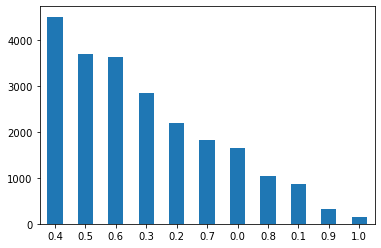

In [16]:
features.Burn_Rate.value_counts().plot(kind="bar", rot=0)

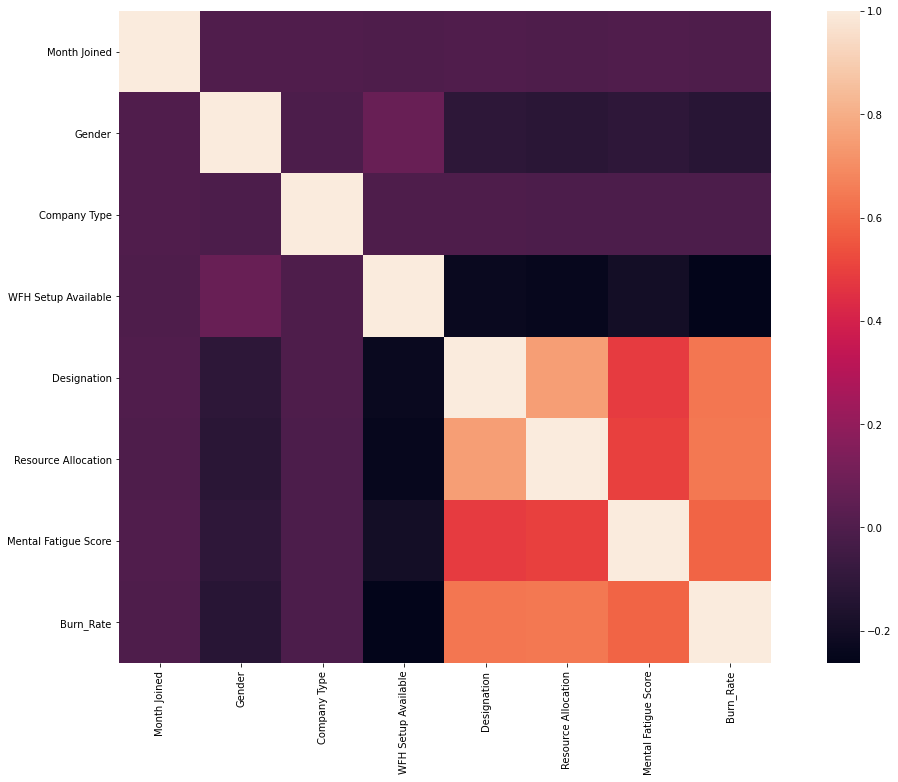

In [17]:
# A general correlations matrix
corr_mat = features.corr() 
fig, ax = plt.subplots(figsize=(20, 12)) 
sns.heatmap(corr_mat, vmax=1.0, square=True, ax=ax);

In [18]:
features.columns = features.columns.str.replace(' ', '_')
features.head()

,Month_Joined,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
0,9,1,0,0,2.0,3.0,3.8,0.2
1,11,0,0,1,1.0,2.0,5.0,0.4
2,3,1,1,1,2.0,0.0,5.8,0.5
3,11,0,0,1,1.0,1.0,2.6,0.2
4,7,1,0,0,3.0,7.0,6.9,0.5


In [19]:
features_test.head()

,Month Joined,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,12,1,0,0,2.0,5.0,7.7
1,8,1,1,1,1.0,2.0,5.2
2,11,0,1,1,1.0,3.0,5.9
3,2,1,0,0,3.0,6.0,4.6
4,7,1,1,0,2.0,5.0,6.4


In [20]:
X = features['Gender'].values
Y = features['Burn_Rate'].values

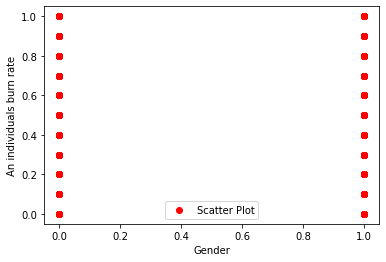

In [21]:
plt.scatter(X, Y, c='red', label='Scatter Plot')
plt.xlabel('Gender')
plt.ylabel('An individuals burn rate')
plt.legend()
plt.show()

In [32]:
x_train = features[["Designation",  "Resource_Allocation"]].values
y_train = features["Burn_Rate"].values
x_test = features_test[["Designation",  "Resource Allocation"]].values
y_test = features_test["Gender"].values

In [33]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
x_scaler = StandardScaler().fit(x_train)
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [34]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [35]:
from tensorflow.keras.layers import Dense
number_inputs = 2
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [36]:
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
# Fit (train) the model
model.fit(
    x_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
711/711 - 1s - loss: 0.2787 - accuracy: 0.9374
Epoch 2/100
711/711 - 0s - loss: 0.0542 - accuracy: 0.9931
Epoch 3/100
711/711 - 0s - loss: 0.0398 - accuracy: 0.9931
Epoch 4/100
711/711 - 0s - loss: 0.0323 - accuracy: 0.9931
Epoch 5/100
711/711 - 0s - loss: 0.0287 - accuracy: 0.9931
Epoch 6/100
711/711 - 0s - loss: 0.0268 - accuracy: 0.9931
Epoch 7/100
711/711 - 0s - loss: 0.0264 - accuracy: 0.9931
Epoch 8/100
711/711 - 0s - loss: 0.0263 - accuracy: 0.9931
Epoch 9/100
711/711 - 0s - loss: 0.0261 - accuracy: 0.9931
Epoch 10/100
711/711 - 0s - loss: 0.0259 - accuracy: 0.9931
Epoch 11/100
711/711 - 0s - loss: 0.0259 - accuracy: 0.9931
Epoch 12/100
711/711 - 0s - loss: 0.0257 - accuracy: 0.9931
Epoch 13/100
711/711 - 0s - loss: 0.0256 - accuracy: 0.9931
Epoch 14/100
711/711 - 0s - loss: 0.0256 - accuracy: 0.9931
Epoch 15/100
711/711 - 0s - loss: 0.0254 - accuracy: 0.9931
Epoch 16/100
711/711 - 0s - loss: 0.0253 - accuracy: 0.9931
Epoch 17/100
711/711 - 0s - loss: 0.0251 - accura

In [40]:
model_loss, model_accuracy = model.evaluate(
    x_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

383/383 - 0s - loss: 4.4041 - accuracy: 0.4738
Loss: 4.4041361808776855, Accuracy: 0.47379592061042786


In [41]:
#round 2
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=2))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [42]:
deep_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 14        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


In [43]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    x_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
711/711 - 1s - loss: 0.1420 - accuracy: 0.9931
Epoch 2/100
711/711 - 0s - loss: 0.0393 - accuracy: 0.9931
Epoch 3/100
711/711 - 0s - loss: 0.0315 - accuracy: 0.9931
Epoch 4/100
711/711 - 0s - loss: 0.0290 - accuracy: 0.9931
Epoch 5/100
711/711 - 0s - loss: 0.0278 - accuracy: 0.9931
Epoch 6/100
711/711 - 0s - loss: 0.0269 - accuracy: 0.9931
Epoch 7/100
711/711 - 0s - loss: 0.0259 - accuracy: 0.9931
Epoch 8/100
711/711 - 0s - loss: 0.0247 - accuracy: 0.9931
Epoch 9/100
711/711 - 0s - loss: 0.0238 - accuracy: 0.9931
Epoch 10/100
711/711 - 0s - loss: 0.0229 - accuracy: 0.9931
Epoch 11/100
711/711 - 0s - loss: 0.0222 - accuracy: 0.9931
Epoch 12/100
711/711 - 0s - loss: 0.0217 - accuracy: 0.9931
Epoch 13/100
711/711 - 0s - loss: 0.0215 - accuracy: 0.9931
Epoch 14/100
711/711 - 0s - loss: 0.0213 - accuracy: 0.9931
Epoch 15/100
711/711 - 0s - loss: 0.0212 - accuracy: 0.9931
Epoch 16/100
711/711 - 0s - loss: 0.0211 - accuracy: 0.9931
Epoch 17/100
711/711 - 0s - loss: 0.0210 - accura

In [ ]:
model_loss, model_accuracy = model.evaluate(
    x_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
model_loss, model_accuracy = deep_model.evaluate(
    x_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [31]:
y_train_categorical.shape

(22750, 11)